In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from powerbiclient import QuickVisualize, get_dataset_config, Report
from powerbiclient.authentication import DeviceCodeLoginAuthentication

In [2]:
# Load the data
file_path = r'C:\Users\ponia\OneDrive\Desktop\LidocainePatches-after_review\Lidocaine_patches_after_review.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Summarizing the total number of items dispensed across the entire dataset
total_items_dispensed = data['Items'].sum()
print(f"Total items dispensed: {total_items_dispensed}")


Total items dispensed: 136431


In [3]:
# Grouping the data by 'Health Boards' and summarizing the number of items dispensed for each board
items_by_health_board = data.groupby('Health Boards')['Items'].sum().reset_index()
items_by_health_board.sort_values(by='Items', ascending=False, inplace=True)

# Display the result
print(items_by_health_board)

                                     Health Boards  Items
0            Aneurin Bevan University Health Board  32956
3  Cwm Taf Morgannwg University Local Health Board  29788
4                Hywel Dda University Health Board  24526
1          Betsi Cadwaladr University Health Board  17565
6        Swansea Bay University Local Health Board  15927
2         Cardiff and Vale University Health Board  10162
5                      Powys Teaching Health Board   5507


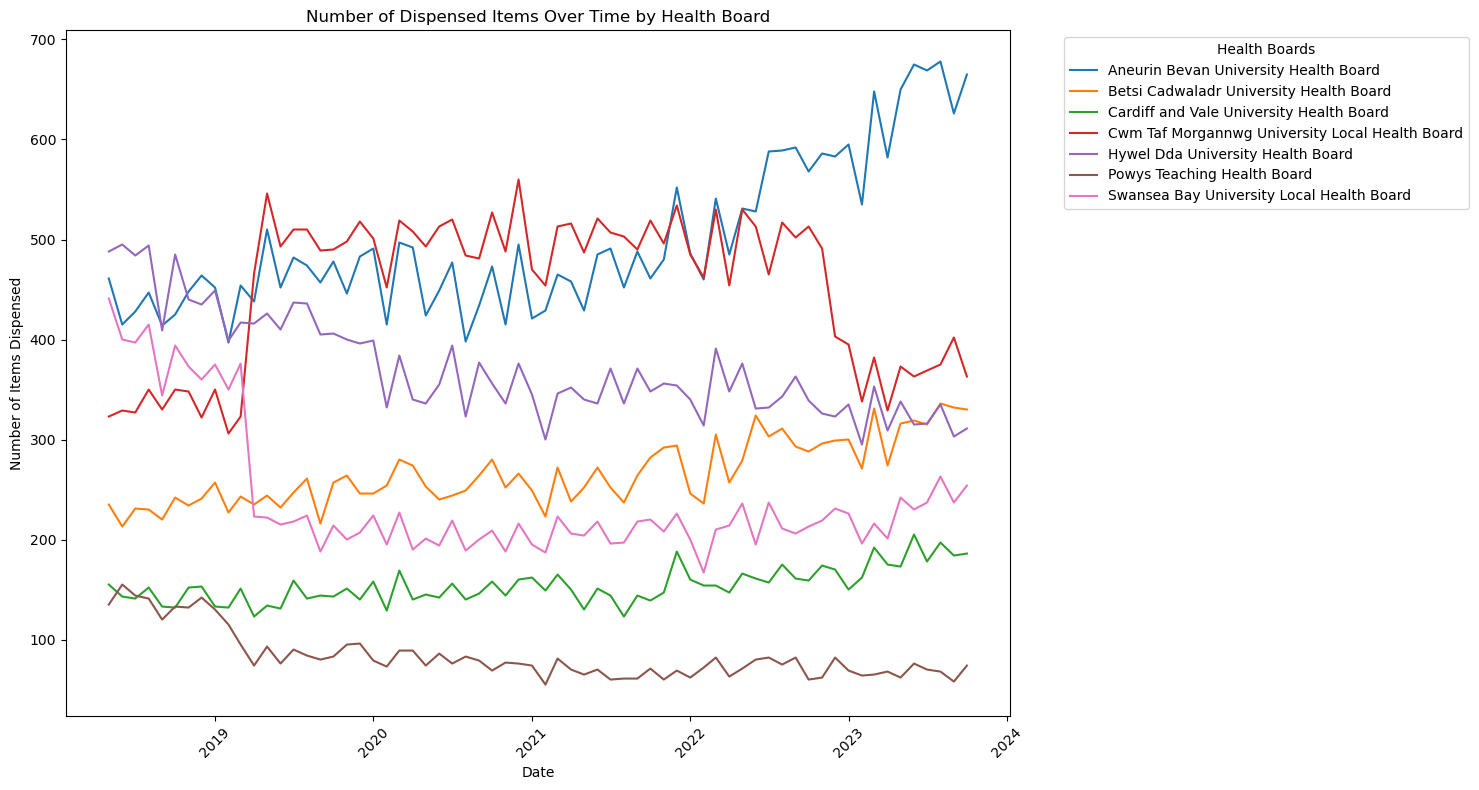

In [6]:
# Convert 'Full Date' column to datetime
data['Full Date'] = pd.to_datetime(data['Full Date'], format='%d.%m.%Y')

# Group by 'Health Boards' and 'Full Date' and sum the items
grouped_data = data.groupby(['Health Boards', 'Full Date'])['Items'].sum().reset_index()

# Plotting
plt.figure(figsize=(15, 8))
sns.lineplot(x='Full Date', y='Items', hue='Health Boards', data=grouped_data)
plt.title('Number of Dispensed Items Over Time by Health Board')
plt.xlabel('Date')
plt.ylabel('Number of Items Dispensed')
plt.legend(title='Health Boards', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Population data for each Health Board
population_data = {
    'Betsi Cadwaladr University Health Board': 687041,
    'Powys Teaching Health Board': 132627,
    'Hywel Dda University Health Board': 381017,
    'Swansea Bay University Local Health Board': 381038,
    'Cwm Taf Morgannwg University Local Health Board': 441960,
    'Aneurin Bevan University Health Board': 586855,
    'Cardiff and Vale University Health Board': 492127
}

# Calculate the total number of items dispensed for each Health Board
total_items_by_health_board = data.groupby('Health Boards')['Items'].sum()

# Calculating items dispensed per 1,000 citizens
items_per_1000 = total_items_by_health_board.copy()
for board in items_per_1000.index:
    items_per_1000[board] = (items_per_1000[board] / population_data[board]) * 1000

# Converting to a DataFrame for better readability
items_per_1000_df = items_per_1000.reset_index(name='Items per 1000 Citizens')
print(items_per_1000_df)

                                     Health Boards  Items per 1000 Citizens
0            Aneurin Bevan University Health Board                56.156972
1          Betsi Cadwaladr University Health Board                25.566160
2         Cardiff and Vale University Health Board                20.649141
3  Cwm Taf Morgannwg University Local Health Board                67.399765
4                Hywel Dda University Health Board                64.369831
5                      Powys Teaching Health Board                41.522465
6        Swansea Bay University Local Health Board                41.798981


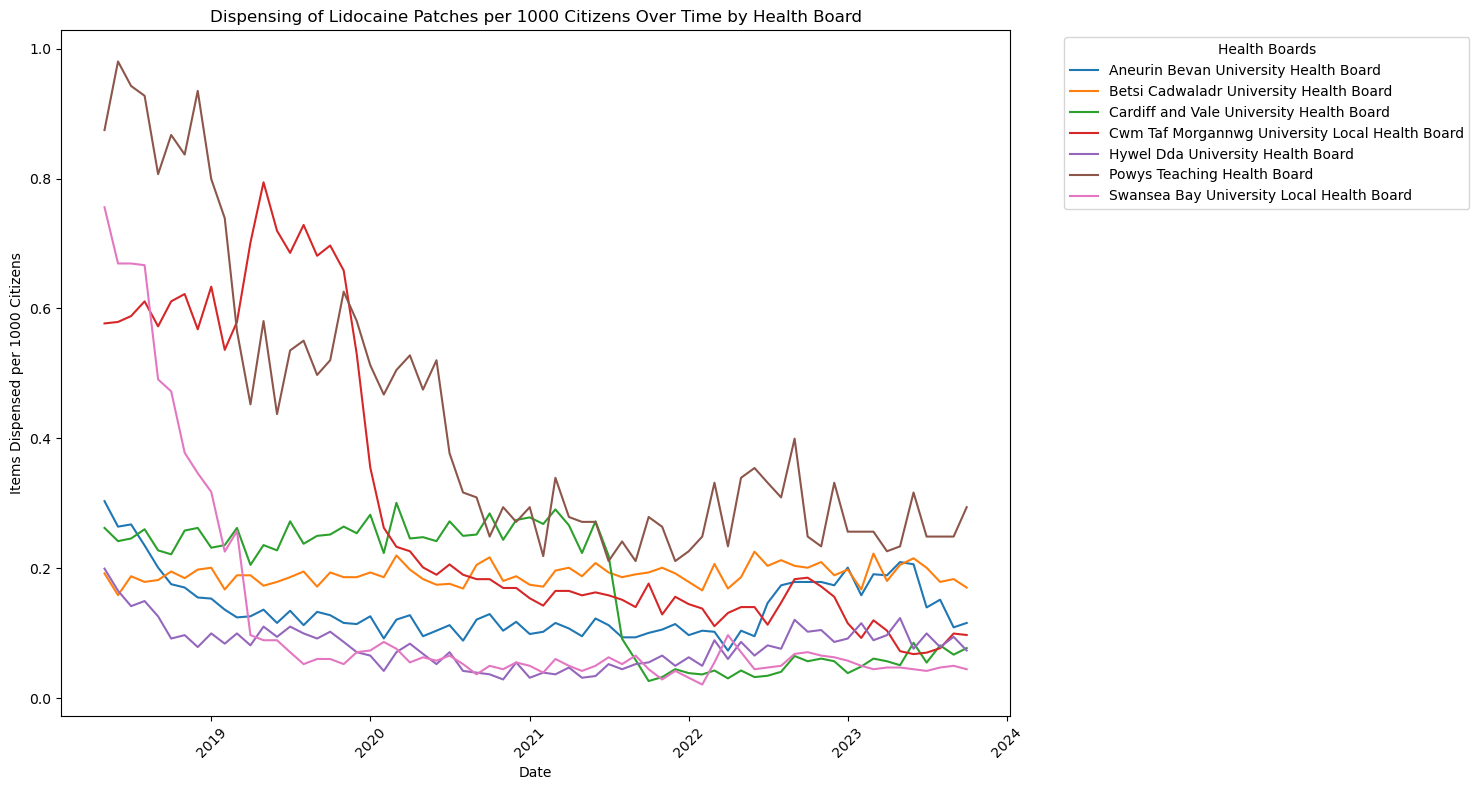

In [8]:
# Filter the data for lidocaine patches
lidocaine_data = data[data['BNFName'].str.contains('Lido', case=False)]

# Group by 'Health Boards' and 'Full Date', then sum the items
grouped_lidocaine_data = lidocaine_data.groupby(['Health Boards', 'Full Date'])['Items'].sum().reset_index()

# Calculate the dispensing rate per 1,000 citizens for each Health Board on each date
grouped_lidocaine_data['Items per 1000 Citizens'] = grouped_lidocaine_data.apply(
    lambda row: (row['Items'] / population_data[row['Health Boards']]) * 1000, axis=1)

# Plotting
plt.figure(figsize=(15, 8))
sns.lineplot(x='Full Date', y='Items per 1000 Citizens', hue='Health Boards', data=grouped_lidocaine_data)
plt.title('Dispensing of Lidocaine Patches per 1000 Citizens Over Time by Health Board')
plt.xlabel('Date')
plt.ylabel('Items Dispensed per 1000 Citizens')
plt.legend(title='Health Boards', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Filter the data for lidocaine patches
lidocaine_data = data[data['BNFName'].str.contains('Lido', case=False)]

# Group by 'Health Boards' and 'Full Date', then sum the items
grouped_lidocaine_data = lidocaine_data.groupby(['Health Boards', 'Full Date'])['Items'].sum().reset_index()

# Calculate the dispensing rate per 1,000 citizens for each Health Board on each date
grouped_lidocaine_data['Items per 1000 Citizens'] = grouped_lidocaine_data.apply(
    lambda row: (row['Items'] / population_data[row['Health Boards']]) * 1000, axis=1)

# Creating a pivot table
pivot_table = grouped_lidocaine_data.pivot(index='Full Date', columns='Health Boards', values='Items per 1000 Citizens')

# Displaying the pivot table
print(pivot_table)

Health Boards  Aneurin Bevan University Health Board  \
Full Date                                              
2018-05-01                                  0.303312   
2018-06-01                                  0.264120   
2018-07-01                                  0.267528   
2018-08-01                                  0.235152   
2018-09-01                                  0.201072   
...                                              ...   
2023-06-01                                  0.206184   
2023-07-01                                  0.139728   
2023-08-01                                  0.151656   
2023-09-01                                  0.109056   
2023-10-01                                  0.115872   

Health Boards  Betsi Cadwaladr University Health Board  \
Full Date                                                
2018-05-01                                    0.192128   
2018-06-01                                    0.158651   
2018-07-01                             

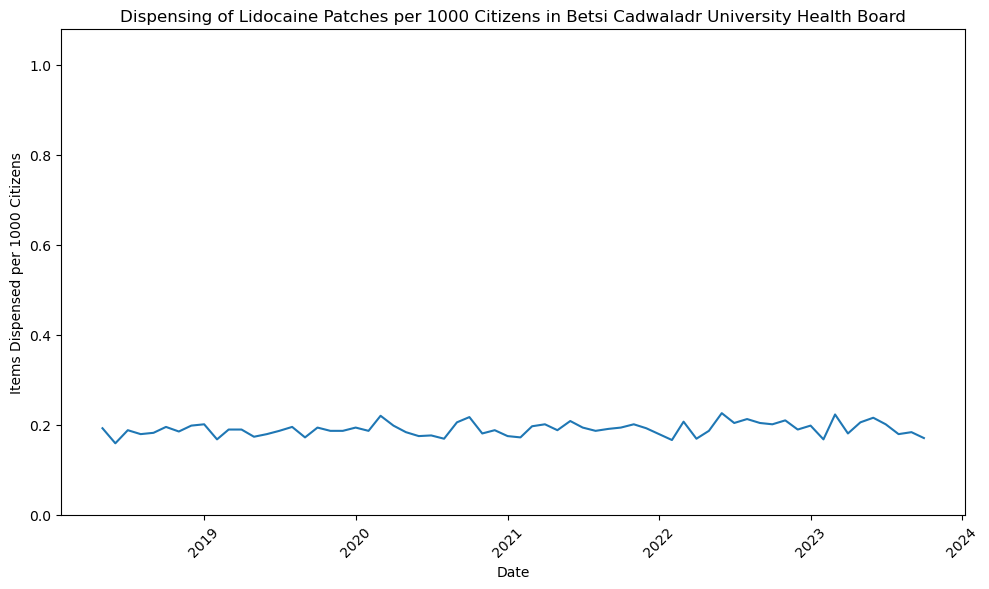

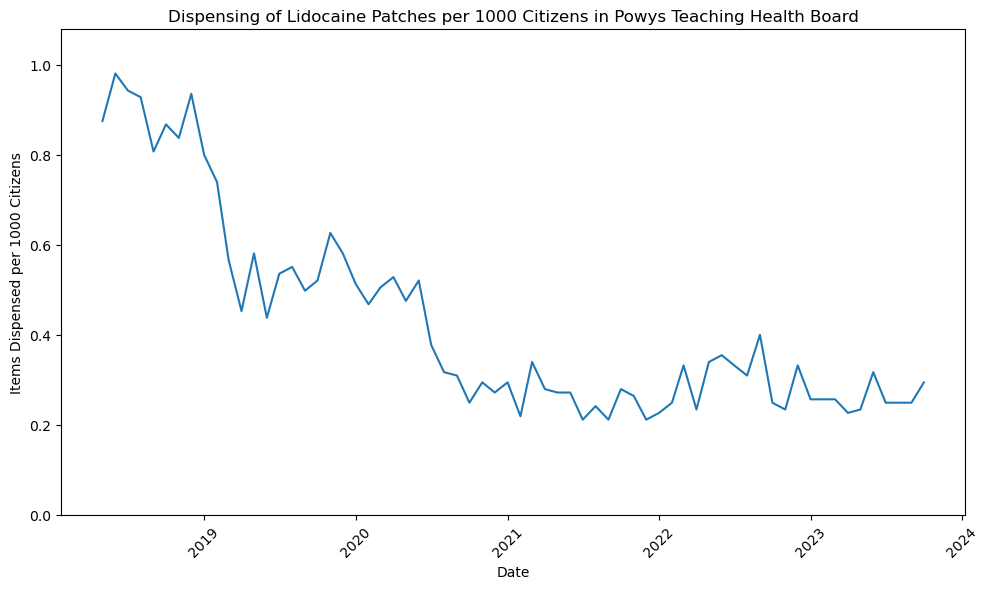

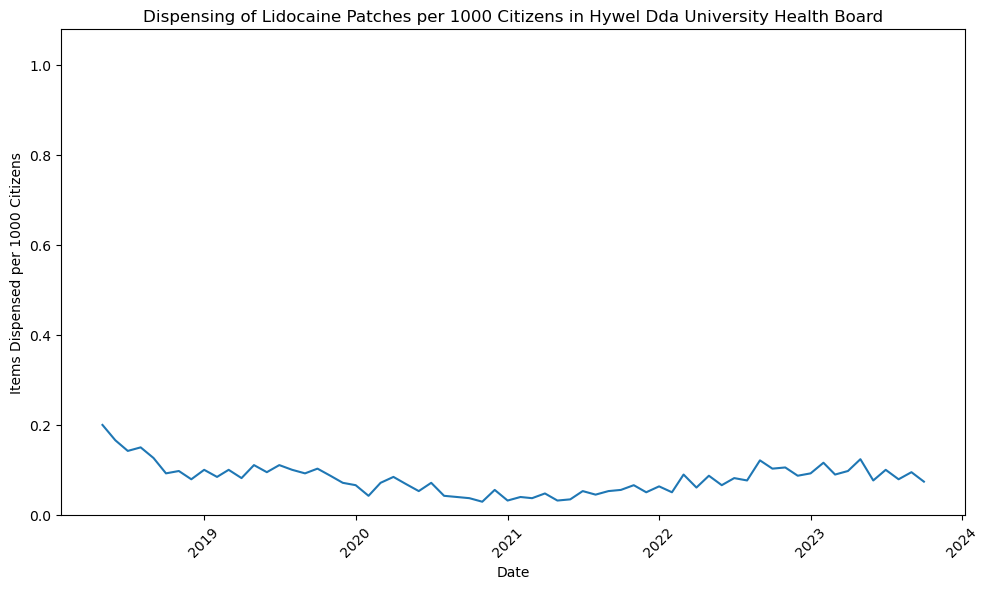

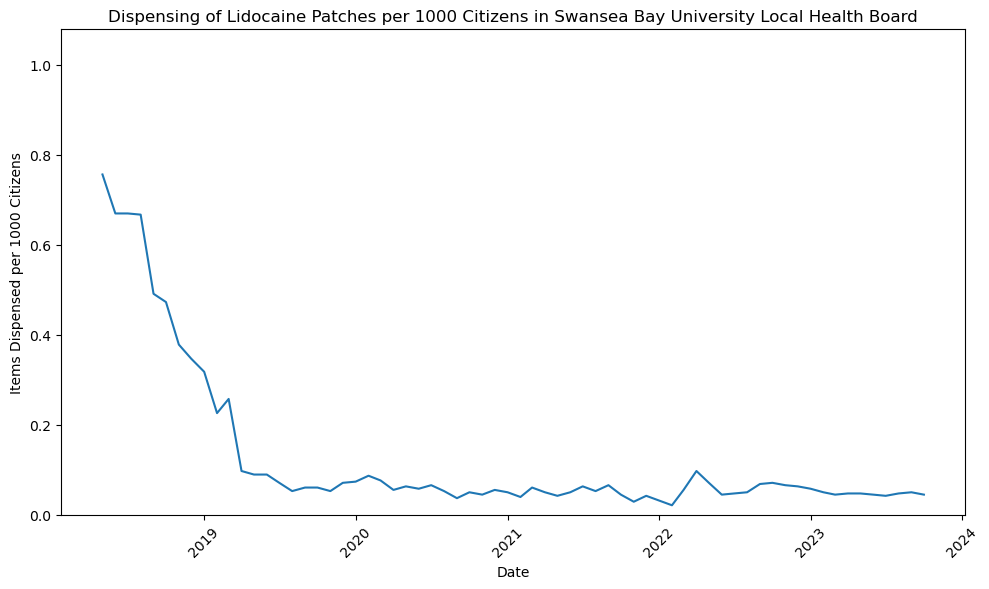

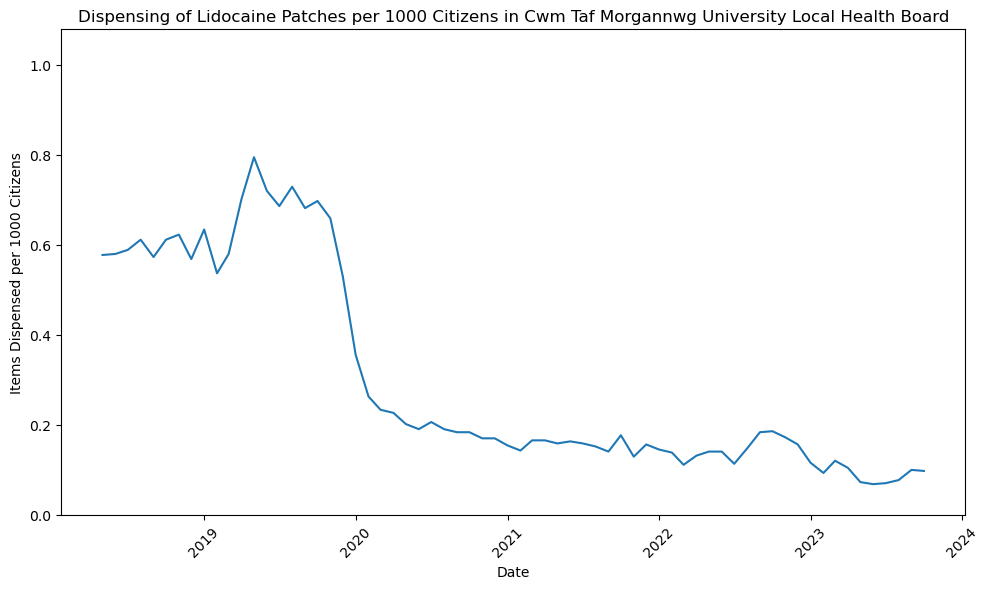

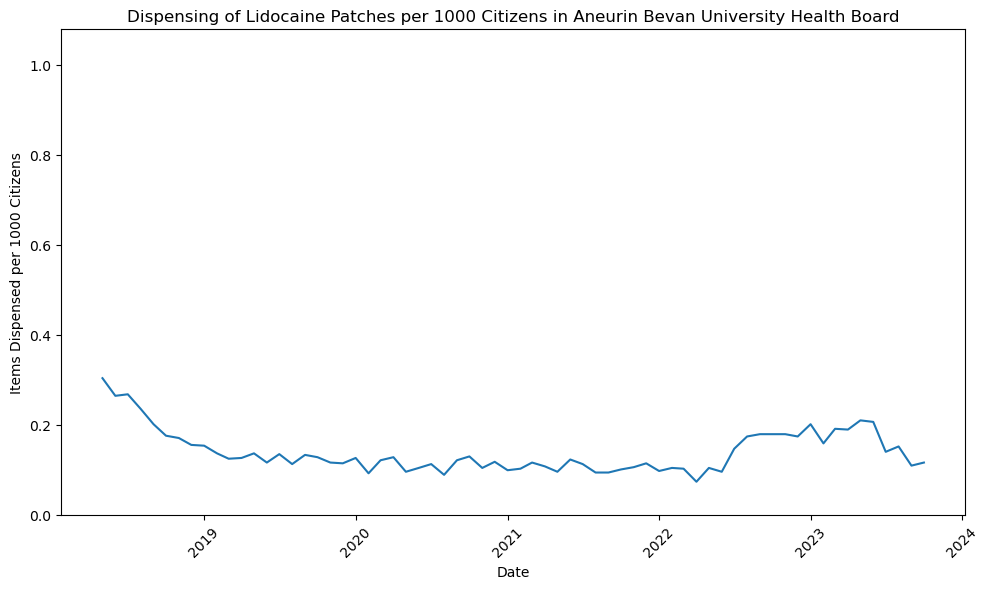

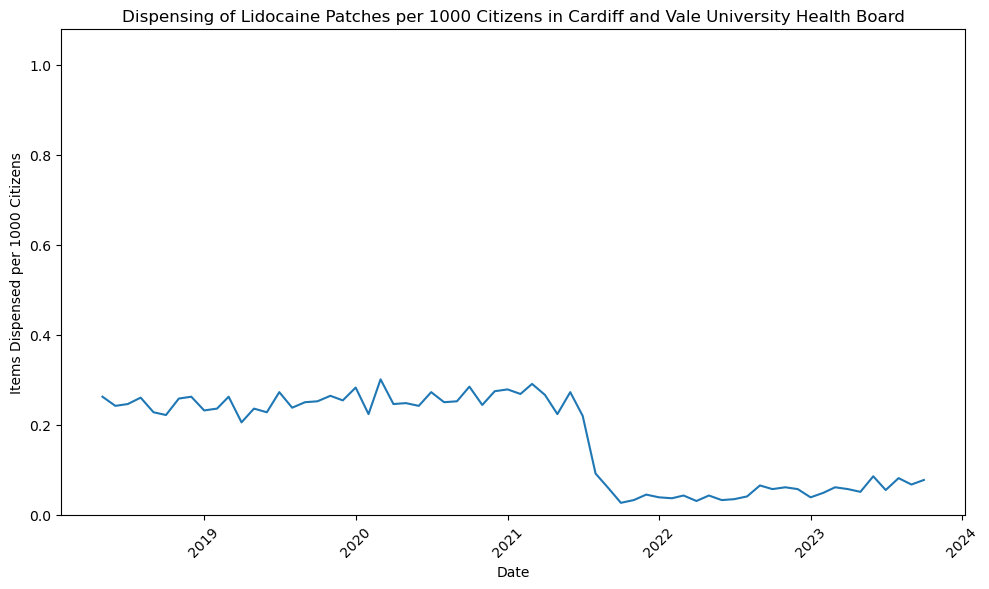

In [12]:
# Filter the data for lidocaine patches
lidocaine_data = data[data['BNFName'].str.contains('Lido', case=False)]

# Group by 'Health Boards' and 'Full Date', then sum the items
grouped_lidocaine_data = lidocaine_data.groupby(['Health Boards', 'Full Date'])['Items'].sum().reset_index()

# Calculate the dispensing rate per 1,000 citizens for each Health Board on each date
grouped_lidocaine_data['Items per 1000 Citizens'] = grouped_lidocaine_data.apply(
    lambda row: (row['Items'] / population_data[row['Health Boards']]) * 1000, axis=1)

# Determine the maximum value for y-axis scale
ymax = grouped_lidocaine_data['Items per 1000 Citizens'].max()

# Plotting for each Health Board
for board in population_data.keys():
    plt.figure(figsize=(10, 6))
    board_data = grouped_lidocaine_data[grouped_lidocaine_data['Health Boards'] == board]
    sns.lineplot(x='Full Date', y='Items per 1000 Citizens', data=board_data)
    plt.title(f'Dispensing of Lidocaine Patches per 1000 Citizens in {board}')
    plt.xlabel('Date')
    plt.ylabel('Items Dispensed per 1000 Citizens')
    plt.ylim(0, ymax * 1.1)  # Consistent y-axis scale for all plots
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [18]:
# Instead of plotting, save the processed data to CSV files
grouped_data.to_csv('grouped_data.csv', index=False)
items_per_1000_df.to_csv('items_per_1000.csv', index=False)
pivot_table.to_csv('pivot_table.csv', index=False)
grouped_lidocaine_data.to_csv('grouped_lidocaine_data.csv', index=False)